In [3]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os

In [14]:
# Reads in a H-matrix in space format
def makematrix(filename):
    mat_in = open(filename)
    mat_in = mat_in.readlines()
    del mat_in[0]
    del mat_in[0]
    for i in range(len(mat_in)):
        mat_in[i] = mat_in[i].split()
        for j in range(len(mat_in[i])):
            mat_in[i][j] = float(mat_in[i][j])
    return mat_in

# Iterates through all H-matrices
raw_data = []
directory = '/Users/jessicalee/Documents/pytorch-workspace/matrices'
for filename in os.listdir(directory):
    raw_data.append(makematrix(os.path.join(directory, filename)))
print raw_data

[[[-1.462932, 0.0, 0.0, 0.123435], [0.0, -1.196098, 0.123435, -0.0], [0.0, 0.123435, -1.196098, -0.0], [0.123435, -0.0, -0.0, -0.878207]], [[-1.0, 0.0, 0.0, 0.123435], [0.0, -1.196098, 0.123435, -0.0], [0.0, 0.123435, -1.196098, -0.0], [0.123435, -0.0, -0.0, -0.878207]], [[-1.462932, 0.0, 0.0, 1.123435], [0.0, -1.196098, 0.123435, -0.0], [0.0, 0.123435, -1.196098, -0.0], [1.123435, -0.0, -0.0, -0.878207]]]


In [15]:
# Returns ground state eigenvector
def ground_state(ham_matrix):
    eigval, eigvec = LA.eigh(ham_matrix)
    eigvec = eigvec.transpose()
    eigsys = {}
    for i in range(len(eigval)):
        eigsys[eigval[i]] = eigvec[i]
    return eigsys[min(eigval)]

# Get list of ground states from list of H-matrices
all_matrices = raw_data
ground_states = range(len(all_matrices))
for i in range(len(all_matrices)):
    ground_states[i] = ground_state(all_matrices[i])
np_ground_states = np.asarray(ground_states)
print np_ground_states

[[-9.80116677e-01 -2.49800181e-16  0.00000000e+00  1.98422022e-01]
 [-1.54079542e-16 -7.07106781e-01  7.07106781e-01  4.44089210e-16]
 [ 7.91154606e-01  1.11022302e-16  0.00000000e+00 -6.11616211e-01]]


In [16]:
# Establish 2D data array
raw_data = np_ground_states
data_size = len(raw_data) # Number of data points
data_dim = len(raw_data[0]) # Dimension of each data point
print(data_size)
print(data_dim)

3
4


In [18]:
# Raw scores to deviation scores (standardize)
ones = np.ones((data_size, data_size))
interm_1 = ones.dot(raw_data)
#print interm_1
interm_2 = np.multiply( interm_1 , (1.0/data_size) )
#print interm_2
standardized_data = np.subtract( raw_data, interm_2 )

# Get covariance matrix
cov = (standardized_data.transpose()).dot(standardized_data)
cov = np.multiply(cov, (1.0/data_size))
print cov

[[ 0.52488403 -0.01484626  0.01484626 -0.23479524]
 [-0.01484626  0.11111111 -0.11111111 -0.0324636 ]
 [ 0.01484626 -0.11111111  0.11111111  0.0324636 ]
 [-0.23479524 -0.0324636   0.0324636   0.11884529]]


In [19]:
# Make dictionary for eigensystem of covariance matrix
eigval, eigvec = LA.eig(cov)
eigvec = eigvec.transpose()

eigsys = {}
for i in range(len(eigval)):
    eigsys[eigval[i]] = eigvec[i]

print eigsys

{-4.336808689942018e-18: array([-0.40555958, -0.15664649,  0.15664649, -0.88681744]), 0.2336908945735043: array([-0.09213348,  0.68953744, -0.68953744, -0.20146382]), 0.6322606496128198: array([ 9.09413464e-01,  3.22796942e-16, -1.65626318e-16, -4.15893196e-01]), 2.7423687441362844e-18: array([-2.73869903e-04, -7.07212402e-01, -7.07000838e-01, -5.98858023e-04])}


In [20]:
# Get principal components
def principal_comp(num_comp, eigsys):
    eigvals = eigsys.keys()
    eigvals.sort()
    components = range(num_comp)
    for i in range(num_comp):
        components[i] = eigvals[len(eigvals) - i - 1]
    return components

# DECLARE NUMBER OF COMPONENTS
num_comp = 2
principal_values = principal_comp(num_comp, eigsys)
print principal_values

[0.6322606496128198, 0.2336908945735043]


In [21]:
# Make feature vectors matrix and transpose
feature_matrix = range(num_comp)
for i in range(num_comp):
    feature_matrix[i] = eigsys[principal_values[i]]

feature_matrix = np.asarray(feature_matrix)

proj_data = np.dot(feature_matrix, standardized_data.transpose())

print proj_data

[[-9.73853672e-01 -4.44089210e-16  9.73853672e-01]
 [ 3.41826633e-01 -6.83653267e-01  3.41826633e-01]]


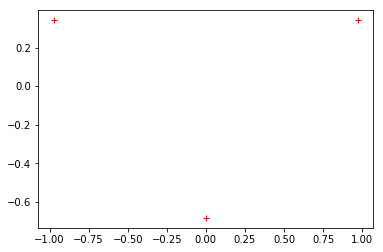

In [22]:
# Graph 2D data
plt.figure()
plt.plot(proj_data[0], proj_data[1], 'r+')
plt.show()